<a href="https://colab.research.google.com/github/POSiTiiiV/CNN-with-RL/blob/testing/minorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
ocular_disease = pd.read_csv('full_df.csv')
ocular_disease.head()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ocular_disease

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [ ]:
import pandas as pd

# Load the DataFrame
ocular_disease = pd.read_csv('full_df.csv')

# Calculate the number of images for each disease using the 'labels' column
disease_counts = ocular_disease['labels'].value_counts()

# Display the result
print(disease_counts)

labels
['N']    2873
['D']    1608
['O']     708
['C']     293
['G']     284
['A']     266
['M']     232
['H']     128
Name: count, dtype: int64


In [ ]:
# Create a mapping of abbreviations to disease names
disease_mapping = {
    "['N']": 'Normal',
    "['D']": 'Diabetic Retinopathy',
    "['G']": 'Glaucoma',
    "['C']": 'Cataract',
    "['A']": 'Age-related Macular Degeneration',
    "['H']": 'Hypertension',
    "['M']": 'Myopia',
    "['O']": 'Other diseases'
}

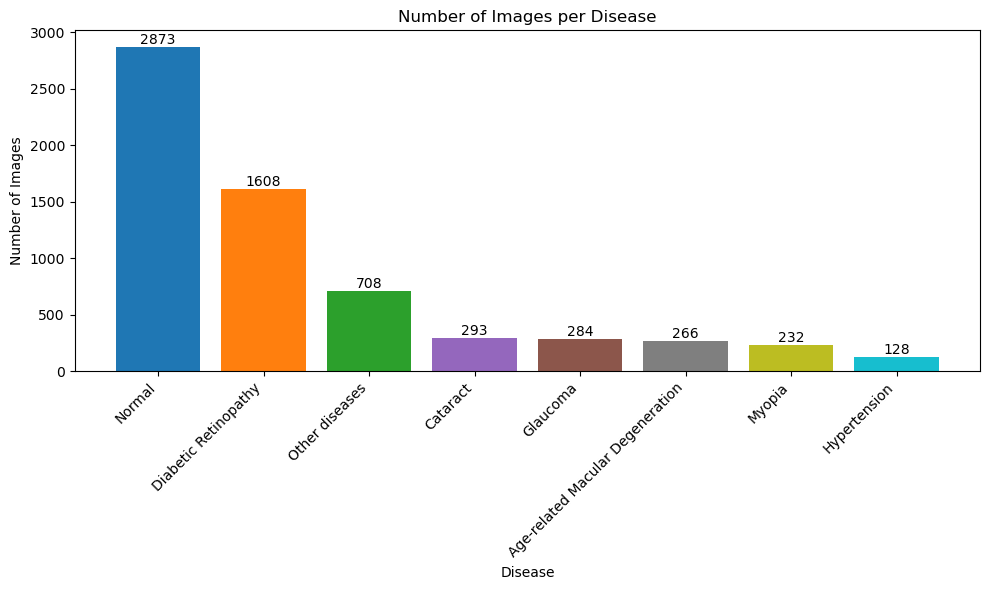

In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of images for each disease using the 'labels' column
disease_counts = ocular_disease['labels'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
colors = plt.cm.get_cmap('tab10', len(disease_counts))  # Use a colormap for distinct colors
bars = plt.bar(disease_counts.index, disease_counts.values, color=colors(range(len(disease_counts))))

# Add labels and title
plt.xlabel('Disease')
plt.ylabel('Number of Images')
plt.title('Number of Images per Disease')

# Add counts above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')

# Customize x-axis ticks with disease names
plt.xticks(disease_counts.index, [disease_mapping[d] for d in disease_counts.index], rotation=45, ha='right')

plt.tight_layout()
plt.show()

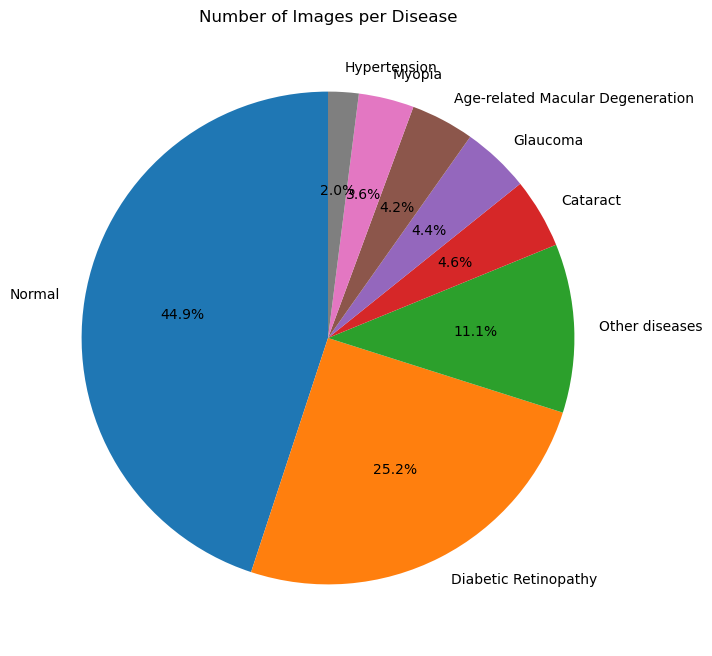

In [ ]:
# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(disease_counts, labels=[disease_mapping[d] for d in disease_counts.index], autopct='%1.1f%%', startangle=90)
ax.set_title('Number of Images per Disease')

plt.show()

In [ ]:
import altair as alt

# Count the occurrences of each gender
gender_counts = ocular_disease['Patient Sex'].value_counts().reset_index()
gender_counts.columns = ['Patient Sex', 'count']

# Create the bar chart
alt.Chart(gender_counts).mark_bar().encode(
    x='Patient Sex:N',
    y='count:Q',
    tooltip=['Patient Sex', 'count'],
    color='Patient Sex:N'
).properties(
    title='Gender Distribution'
)

alt.Chart(...)

In [ ]:
import pandas as pd
import altair as alt

# Calculate the number of images per disease for each gender
disease_gender_counts = ocular_disease.groupby(['Patient Sex', 'labels']).size().reset_index(name='Count')

# Replace labels with disease names
disease_gender_counts['labels'] = disease_gender_counts['labels'].map(disease_mapping)

# Create the bar chart
chart = alt.Chart(disease_gender_counts).mark_bar().encode(
    x=alt.X('labels:N', axis=alt.Axis(title='Disease')),  # Disease on x-axis
    y=alt.Y('Count:Q', title='Number of Images'),  # Count on y-axis
    color='Patient Sex:N',  # Color by gender
    column=alt.Column('Patient Sex:N')  # Facet by gender
).properties(
    title='Number of Images per Disease by Gender'
).interactive()  # Make the chart interactive

# Display the chart
chart

alt.Chart(...)

# Loading images    

In [ ]:
import os

# Assuming 'ocular_disease' DataFrame is already loaded as in the provided code.

image_dir = 'C:/Users/gokus/PycharmProjects/pythonProject/minorProject/ocular diseases dataset/ODIR-5K/ODIR-5K/Training Images'  # Replace with the actual path

# Loop through the DataFrame and try to open each image file
for index, row in ocular_disease.iterrows():
    left_image_filename = row['Left-Fundus']
    right_image_filename = row['Right-Fundus']

    left_image_path = os.path.join(image_dir, left_image_filename)
    right_image_path = os.path.join(image_dir, right_image_filename)

    # Check if the files exist before attempting to open them
    if os.path.exists(left_image_path):
      try:
        # Attempt to open the left image file (but don't display or process it)
        with open(left_image_path, 'rb'):
          pass # File exists and can be opened, but we don't display or process
      except Exception as e:
        print(f"Error opening left image {left_image_filename}: {e}")

    else:
        print(f"Left image file not found: {left_image_path}")

    if os.path.exists(right_image_path):
      try:
        # Attempt to open the right image file (but don't display or process it)
        with open(right_image_path, 'rb'):
          pass #File exists and can be opened, but we don't display or process
      except Exception as e:
        print(f"Error opening right image {right_image_filename}: {e}")
    else:
        print(f"Right image file not found: {right_image_path}")

# Apply preprocessing

In [ ]:
import os
from PIL import Image
import cv2
import numpy as np

image_dir = 'C:/Users/gokus/PycharmProjects/pythonProject/minorProject/ocular diseases dataset/ODIR-5K/ODIR-5K/Training Images'  # Replace with the actual path
target_size = (224, 224)  # target size

# Create the 'preprocessed' directory if it doesn't exist
os.makedirs("preprocessed", exist_ok=True)

def preprocess_image(image_path, target_size):
    try:
        # Open the image
        img = Image.open(image_path)

        # Resize the image
        img = img.resize(target_size)

        # Ensure RGB format
        img = img.convert("RGB")

        # Convert to numpy array
        img_np = np.array(img)

        # Apply CLAHE to each channel separately
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        img_np[:, :, 0] = clahe.apply(img_np[:, :, 0])
        img_np[:, :, 1] = clahe.apply(img_np[:, :, 1])
        img_np[:, :, 2] = clahe.apply(img_np[:, :, 2])

        # Apply Gaussian Blur
        img_np = cv2.GaussianBlur(img_np, (5, 5), 0)

        # Normalize the image
        img_np = img_np / 255.0

        # Convert back to PIL image
        img = Image.fromarray((img_np * 255).astype(np.uint8))

        # Save the preprocessed image
        img.save(os.path.join("preprocessed", os.path.basename(image_path)))

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

# Loop through the DataFrame and preprocess each image
for index, row in ocular_disease.iterrows():
    left_image_filename = row['Left-Fundus']
    right_image_filename = row['Right-Fundus']

    left_image_path = os.path.join(image_dir, left_image_filename)
    right_image_path = os.path.join(image_dir, right_image_filename)

    # Check if the files exist and preprocess
    if os.path.exists(left_image_path):
        preprocess_image(left_image_path, target_size)
    else:
        print(f"Left image file not found: {left_image_path}")

    if os.path.exists(right_image_path):
        preprocess_image(right_image_path, target_size)
    else:
        print(f"Right image file not found: {right_image_path}")

# Calculating imbalance in dataset

In [ ]:
# Calculate the number of images needed for each disease to reach the maximum count of 799
max_images_per_class = 799
images_needed = max_images_per_class - disease_counts
images_needed = images_needed[images_needed > 0]  # Only keep diseases that need more images

# Display the result
print("Number of images needed for each disease class to balance the dataset (max 799 images per class):")
print(images_needed)

Number of images needed for each disease class to balance the dataset (max 799 images per class):
labels
['O']     91
['C']    506
['G']    515
['A']    533
['M']    567
['H']    671
Name: count, dtype: int64


# Augmentation and new csv file creation

In [ ]:
import os
from PIL import Image
import numpy as np
from imgaug import augmenters as iaa
import pandas as pd

# Load the DataFrame
ocular_disease = pd.read_csv('full_df.csv')

# Calculate the number of images for each disease using the 'labels' column
disease_counts = ocular_disease['labels'].value_counts()

# Define the maximum number of images per disease class
max_images_per_class = 799

# Calculate the number of images needed for each disease to reach the maximum count
images_needed = max_images_per_class - disease_counts
images_needed = images_needed[images_needed > 0]  # Only keep diseases that need more images

# Define the augmentation sequence
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flips
    iaa.Affine(rotate=(-15, 15)),  # Rotation
    iaa.Multiply((0.9, 1.1), per_channel=0.2),  # Brightness
    iaa.LinearContrast((0.8, 1.2)),  # Contrast
    iaa.GaussianBlur(sigma=(0, 0.5))  # Blurring
])

# Create the 'augmented_images' directory if it doesn't exist
os.makedirs("augmented_images", exist_ok=True)

image_dir = 'preprocessed'

# List to store information of augmented images
augmented_data = []

for label, num_needed in images_needed.items():
    if num_needed > 0:  # Only augment if images are needed
        # Filter rows in the DataFrame for the current label
        label_rows = ocular_disease[ocular_disease['labels'] == label]

        count = 0
        for i in range(int(num_needed)):
            count += 1
            # Select a random image from the current label class
            random_image_index = np.random.choice(label_rows.index)
            row = label_rows.loc[random_image_index]

            image_filename = row['filename']
            image_path = os.path.join(image_dir, image_filename)

            try:
                img = Image.open(image_path)
                img = np.array(img)
                # Perform augmentation
                img_aug = seq(image=img)
                img_aug = Image.fromarray(img_aug)
                new_filename = f"augmented_{label}_{i}_{image_filename}"
                new_filepath = os.path.join("augmented_images", new_filename)
                img_aug.save(new_filepath)

                # Store information of the augmented image
                new_row = row.copy()
                new_row['filename'] = new_filename
                new_row['filepath'] = new_filepath
                new_row['labels'] = label
                augmented_data.append(new_row)

            except FileNotFoundError:
                print(f"Image file not found: {image_path}")
            except Exception as e:
                print(f"Error augmenting image {image_filename}: {e}")
        print(label, count)

# Convert the list to a DataFrame
augmented_df = pd.DataFrame(augmented_data)

# Save the DataFrame to a new CSV file
augmented_df.to_csv("augmented_images_info.csv", index=False)

['O'] 91
['C'] 506
['G'] 515
['A'] 533
['M'] 567
['H'] 671


In [ ]:
augmented_df = pd.read_csv('augmented_images_info.csv')
augmented_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2883 entries, 0 to 2882
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         2883 non-null   int64 
 1   Patient Age                2883 non-null   int64 
 2   Patient Sex                2883 non-null   object
 3   Left-Fundus                2883 non-null   object
 4   Right-Fundus               2883 non-null   object
 5   Left-Diagnostic Keywords   2883 non-null   object
 6   Right-Diagnostic Keywords  2883 non-null   object
 7   N                          2883 non-null   int64 
 8   D                          2883 non-null   int64 
 9   G                          2883 non-null   int64 
 10  C                          2883 non-null   int64 
 11  A                          2883 non-null   int64 
 12  H                          2883 non-null   int64 
 13  M                          2883 non-null   int64 
 14  O       

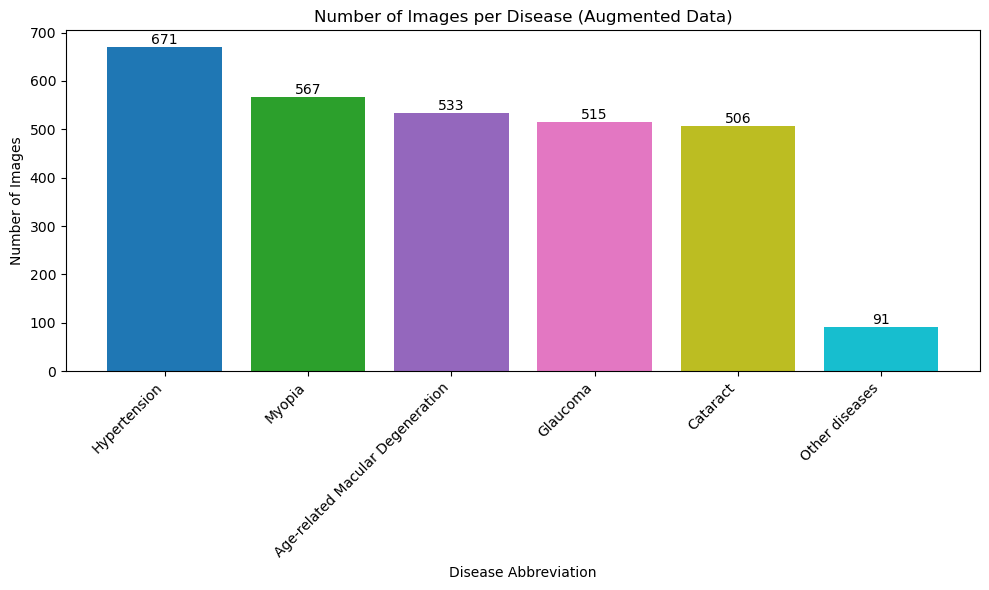

In [ ]:
# prompt: read augmented_full_df.csv file and generate a bar plot showing different diseases

import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame
augmented_df = pd.read_csv('augmented_images_info.csv')

# Calculate disease counts
disease_counts = augmented_df['labels'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
colors = plt.cm.get_cmap('tab10', len(disease_counts))  # Use a colormap for distinct colors
bars = plt.bar(disease_counts.index, disease_counts.values, color=colors(range(len(disease_counts))))

# Add labels and title
plt.xlabel('Disease Abbreviation')
plt.ylabel('Number of Images')
plt.title('Number of Images per Disease (Augmented Data)')

# Add counts above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')

# Customize x-axis ticks with disease names
plt.xticks(disease_counts.index, [disease_mapping[d] for d in disease_counts.index], rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
import os
import shutil
import pandas as pd

# Define the directories
preprocessed_dir = 'preprocessed'
augmented_dir = 'augmented_images'
merged_dir = 'merged_images'

# Create the merged directory if it doesn't exist
os.makedirs(merged_dir, exist_ok=True)

# Load the dataframes
full_df = pd.read_csv('full_df.csv')
augmented_df = pd.read_csv('augmented_images_info.csv')

# Concatenate the dataframes
merged_df = pd.concat([full_df, augmented_df], ignore_index=True)

# Ensure each disease has only 799 images
balanced_df = merged_df.groupby('labels').head(799)

# Save the balanced dataframe to a new CSV file
balanced_df.to_csv('balanced_full_df.csv', index=False)

# Copy images to the merged directory
for index, row in balanced_df.iterrows():
    filename = row['filename']
    if os.path.exists(os.path.join(preprocessed_dir, filename)):
        shutil.copy(os.path.join(preprocessed_dir, filename), merged_dir)
    elif os.path.exists(os.path.join(augmented_dir, filename)):
        shutil.copy(os.path.join(augmented_dir, filename), merged_dir)

print("Merging completed. The merged images are in the 'merged_images' folder and the balanced CSV file is 'balanced_full_df.csv'.")

Merging completed. The merged images are in the 'merged_images' folder and the balanced CSV file is 'balanced_full_df.csv'.


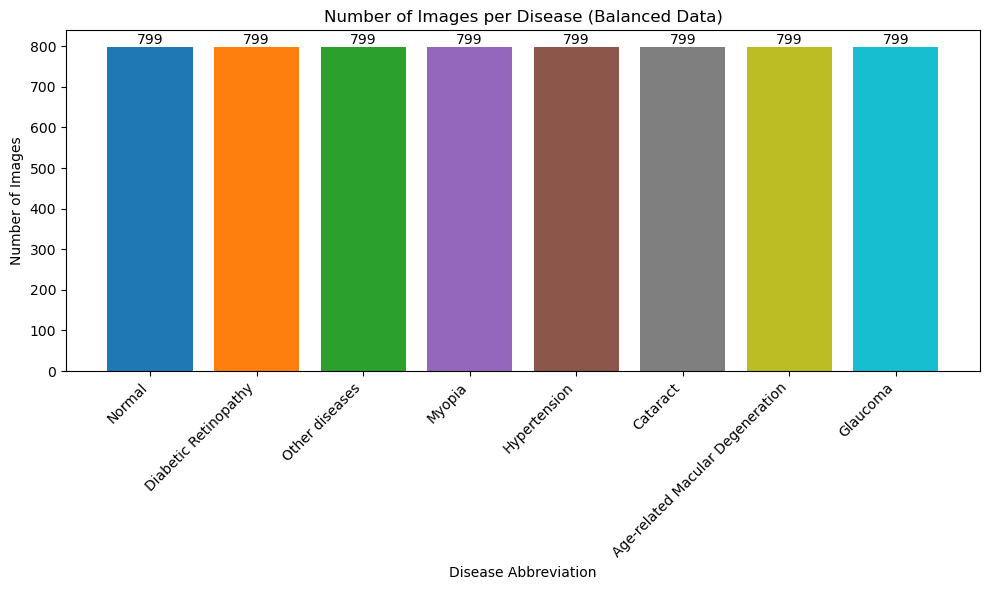

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

# Load the DataFrame
balanced_df = pd.read_csv('balanced_full_df.csv')

# Calculate disease counts
disease_counts = balanced_df['labels'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
colors = plt.cm.get_cmap('tab10', len(disease_counts))  # Use a colormap for distinct colors
bars = plt.bar(disease_counts.index, disease_counts.values, color=colors(range(len(disease_counts))))

# Add labels and title
plt.xlabel('Disease Abbreviation')
plt.ylabel('Number of Images')
plt.title('Number of Images per Disease (Balanced Data)')

# Add counts above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')

# Customize x-axis ticks with disease names
plt.xticks(disease_counts.index, [disease_mapping[d] for d in disease_counts.index], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Splitting images into train, val and test

In [4]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil

# Load the DataFrame
df = pd.read_csv('balanced_full_df.csv')

# Separate original and augmented images
original_df = df[~df['filename'].str.contains('augmented')]
augmented_df = df[df['filename'].str.contains('augmented')]

# Split the original images
train_original_df, temp_original_df = train_test_split(original_df, test_size=0.3, stratify=original_df['labels'], random_state=42)
val_original_df, test_original_df = train_test_split(temp_original_df, test_size=0.5, stratify=temp_original_df['labels'], random_state=42)

# Split the augmented images
train_augmented_df, temp_augmented_df = train_test_split(augmented_df, test_size=0.3, stratify=augmented_df['labels'], random_state=42)
val_augmented_df, test_augmented_df = train_test_split(temp_augmented_df, test_size=0.5, stratify=temp_augmented_df['labels'], random_state=42)

# Combine the splits to maintain the ratio
train_df = pd.concat([train_original_df, train_augmented_df])
val_df = pd.concat([val_original_df, val_augmented_df])
test_df = pd.concat([test_original_df, test_augmented_df])

# Create directories for train, val, and test datasets
os.makedirs('train_images', exist_ok=True)
os.makedirs('val_images', exist_ok=True)
os.makedirs('test_images', exist_ok=True)

# Function to copy images to respective directories
def copy_images(df, folder_name):
    for index, row in df.iterrows():
        filename = row['filename']
        src_path = os.path.join('merged_images', filename)
        dst_path = os.path.join(folder_name, filename)
        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)

# Copy images to respective directories
copy_images(train_df, 'train_images')
copy_images(val_df, 'val_images')
copy_images(test_df, 'test_images')

# Save the DataFrames to CSV files
train_df.to_csv('train_df.csv', index=False)
val_df.to_csv('val_df.csv', index=False)
test_df.to_csv('test_df.csv', index=False)

print("Data split completed. Train, validation, and test images are in their respective folders.")

Data split completed. Train, validation, and test images are in their respective folders.


# Loading preprocessed images

In [ ]:
import pandas as pd

# Load the train, validation, and test DataFrames
train_df = pd.read_csv('train_df.csv')
val_df = pd.read_csv('val_df.csv')
test_df = pd.read_csv('test_df.csv')

In [5]:
import os
import pandas as pd
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch
import ast

# Define the label mapping
label_mapping = {
    "N": 0,
    "D": 1,
    "G": 2,
    "C": 3,
    "A": 4,
    "H": 5,
    "M": 6,
    "O": 7
}

# Define a custom dataset
class FundusDataset(Dataset):
    def __init__(self, dataframe, image_folder, transform=None):
        self.dataframe = dataframe
        self.image_folder = image_folder
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx]['filename']  # Adjust column name as needed
        img_path = os.path.join(self.image_folder, img_name)
        image = Image.open(img_path)
        label_str = self.dataframe.iloc[idx]['labels']  # Adjust column name as needed

        # Convert label from string representation of list to actual list
        label_list = ast.literal_eval(label_str)

        # Map each string label to an integer
        label_indices = [label_mapping[l] for l in label_list]

        # Create a one-hot encoded tensor for the labels
        label = torch.zeros(len(label_mapping), dtype=torch.float32)
        label[label_indices] = 1.0

        if self.transform:
            image = self.transform(image)
        return image, label

# Define a transform to preprocess the input images
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create the datasets and dataloaders
train_image_folder = 'train_images'  # Path to the folder containing training images
val_image_folder = 'val_images'  # Path to the folder containing validation images

train_dataset = FundusDataset(train_df, train_image_folder, transform=preprocess)
val_dataset = FundusDataset(val_df, val_image_folder, transform=preprocess)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Defining feature extraction model

In [6]:
import torch
from torchvision import models
from torchvision.models import DenseNet121_Weights

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load a pre-trained DenseNet model using the weights parameter and move it to the GPU
pretrained_model = models.densenet121(weights=DenseNet121_Weights.IMAGENET1K_V1).to(device)
pretrained_model.eval()

# Function to extract features
def extract_features(dataloader, model, device):
    features = []
    labels = []
    with torch.no_grad():
        for images, lbls in dataloader:
            images = images.to(device)  # Move images to GPU
            output = model.features(images)
            features.append(output.cpu())  # Move output back to CPU before appending
            labels.append(lbls)
    return torch.cat(features), torch.cat(labels)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 40.0MB/s]


## Feature extraction on train and val datasets

In [7]:
# Use the train_dataloader
train_features, train_labels = extract_features(train_dataloader, pretrained_model, device)

# Extract features from the validation dataset
val_features, val_labels = extract_features(val_dataloader, pretrained_model, device)

## saving these extracted features

In [8]:
import torch

# Save the train features and labels
torch.save(train_features, 'train_features.pt')
torch.save(train_labels, 'train_labels.pt')

# Save the validation features and labels
torch.save(val_features, 'val_features.pt')
torch.save(val_labels, 'val_labels.pt')

print("Features and labels saved successfully.")

Features and labels saved successfully.


## loading features and labels

In [ ]:
import torch

# Load the train features and labels
train_features = torch.load('train_features.pt')
train_labels = torch.load('train_labels.pt')

# Load the validation features and labels
val_features = torch.load('val_features.pt')
val_labels = torch.load('val_labels.pt')

print("Train and validation features and labels loaded successfully.")

Train and validation features and labels loaded successfully.


# Define CustomCNN Model

In [10]:
import torch.nn as nn

disease_mapping = {
    "['N']": 'Normal',
    "['D']": 'Diabetic Retinopathy',
    "['G']": 'Glaucoma',
    "['C']": 'Cataract',
    "['A']": 'Age-related Macular Degeneration',
    "['H']": 'Hypertension',
    "['M']": 'Myopia',
    "['O']": 'Other diseases'
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Custom CNN model with dropout
class CustomCNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CustomCNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = nn.ReLU()(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Determine the correct input size for the fully connected layer
sample_feature = val_features[0].view(1, -1)
input_size = sample_feature.size(1)

# Initialize the custom CNN model
num_classes = len(disease_mapping)  # Adjust this to the number of classes in your dataset
model = CustomCNN(input_size, num_classes).to(device)

# Train the CustomCNN Model

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

# Training loop with early stopping
num_epochs = 50
best_val_loss = float('inf')
early_stop_patience = 10
early_stop_counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i in range(0, len(train_features), 32):
        batch_features = train_features[i:i+32].to(device)
        batch_labels = train_labels[i:i+32].to(device)

        # Flatten the features to match the input shape of the fully connected layer
        batch_features = batch_features.view(batch_features.size(0), -1)

        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total_train += batch_labels.size(0)
        correct_train += (predicted == batch_labels.argmax(dim=1)).sum().item()

    avg_loss = running_loss / (len(train_features) // 32)
    train_accuracy = 100 * correct_train / total_train
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%")

    # Validation step
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for i in range(0, len(val_features), 32):
            batch_features = val_features[i:i+32].to(device)
            batch_labels = val_labels[i:i+32].to(device)

            # Flatten the features to match the input shape of the fully connected layer
            batch_features = batch_features.view(batch_features.size(0), -1)

            outputs = model(batch_features)
            loss = criterion(outputs, batch_labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_val += batch_labels.size(0)
            correct_val += (predicted == batch_labels.argmax(dim=1)).sum().item()

    avg_val_loss = val_loss / (len(val_features) // 32)
    val_accuracy = 100 * correct_val / total_val
    print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        early_stop_counter += 1
        if early_stop_counter >= early_stop_patience:
            print("Early stopping triggered")
            break

    # Step the scheduler
    scheduler.step(avg_val_loss)

print("Training complete.")

Epoch [1/50], Loss: 0.8761, Training Accuracy: 65.89%
Validation Loss: 1.0610, Validation Accuracy: 65.45%
Epoch [2/50], Loss: 0.8493, Training Accuracy: 66.09%
Validation Loss: 1.1016, Validation Accuracy: 65.97%
Epoch [3/50], Loss: 0.8422, Training Accuracy: 65.91%
Validation Loss: 1.1044, Validation Accuracy: 64.72%
Epoch [4/50], Loss: 0.9120, Training Accuracy: 64.39%
Validation Loss: 1.0746, Validation Accuracy: 62.63%
Epoch [5/50], Loss: 0.8861, Training Accuracy: 64.89%
Validation Loss: 1.1346, Validation Accuracy: 62.11%
Epoch [6/50], Loss: 0.8630, Training Accuracy: 65.89%
Validation Loss: 0.9509, Validation Accuracy: 68.27%
Epoch [7/50], Loss: 0.7828, Training Accuracy: 69.49%
Validation Loss: 0.9393, Validation Accuracy: 68.89%
Epoch [8/50], Loss: 0.7425, Training Accuracy: 70.81%
Validation Loss: 0.9527, Validation Accuracy: 69.00%
Epoch [9/50], Loss: 0.7366, Training Accuracy: 70.59%
Validation Loss: 0.9432, Validation Accuracy: 70.04%
Epoch [10/50], Loss: 0.7380, Training

In [22]:
  # Save the model's state dictionary
torch.save(model.state_dict(), 'custom_cnn_model.pth')

print("Model saved successfully.")

Model saved successfully.


In [23]:
# Load the test dataset
test_image_folder = 'test_images'  # Path to the folder containing test images
test_dataset = FundusDataset(test_df, test_image_folder, transform=preprocess)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [24]:
# Function to evaluate the model on the test dataset
def evaluate_model(dataloader, model, device):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            # Extract features using the pretrained model
            features = pretrained_model.features(images)
            features = features.view(features.size(0), -1)  # Flatten the features

            outputs = model(features)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            predicted = torch.argmax(outputs, dim=1)
            actual = torch.argmax(labels, dim=1)
            total += labels.size(0)
            correct += (predicted == actual).sum().item()

    avg_test_loss = test_loss / len(dataloader)
    accuracy = 100 * correct / total
    return avg_test_loss, accuracy

# Evaluate the model on the test dataset
test_loss, test_accuracy = evaluate_model(test_dataloader, model, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 0.9388, Test Accuracy: 72.60%


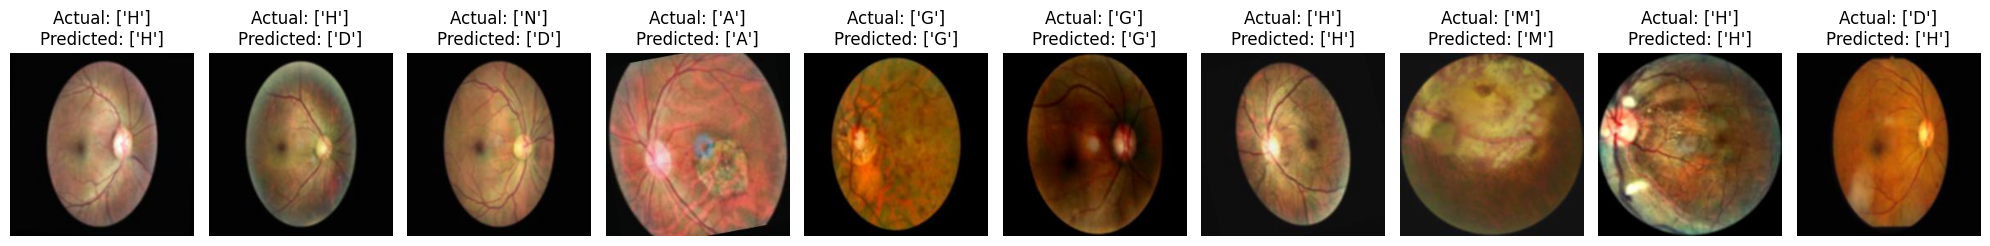

In [27]:
import random
import matplotlib.pyplot as plt

# Define the function to show random images with predictions
def show_random_images_with_predictions(dataloader, model, device, num_images=10):
    model.eval()
    all_images = []
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            # Extract features using the pretrained model
            features = pretrained_model.features(images)
            features = features.view(features.size(0), -1)  # Flatten the features

            outputs = model(features)
            predicted = torch.argmax(outputs, dim=1)

            all_images.extend(images.cpu())
            all_labels.extend(labels.cpu())
            all_predictions.extend(predicted.cpu())

    # Select random indices
    random_indices = random.sample(range(len(all_images)), num_images)

    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    images_shown = 0

    for idx in random_indices:
        img = all_images[idx].permute(1, 2, 0).numpy()
        img = (img * [0.229, 0.224, 0.225]) + [0.485, 0.456, 0.406]  # Unnormalize
        img = img.clip(0, 1)

        actual_labels = [k for k, v in label_mapping.items() if all_labels[idx][v] == 1]
        predicted_label = [k for k, v in label_mapping.items() if v == all_predictions[idx]]

        axes[images_shown].imshow(img)
        axes[images_shown].set_title(f"Actual: {actual_labels}\nPredicted: {predicted_label}")
        axes[images_shown].axis('off')

        images_shown += 1

    plt.tight_layout()
    plt.show()

    return all_images, all_labels, all_predictions

# Show random 10 images with predictions and actual labels
all_images, all_labels, all_predictions = show_random_images_with_predictions(test_dataloader, model, device, num_images=10)

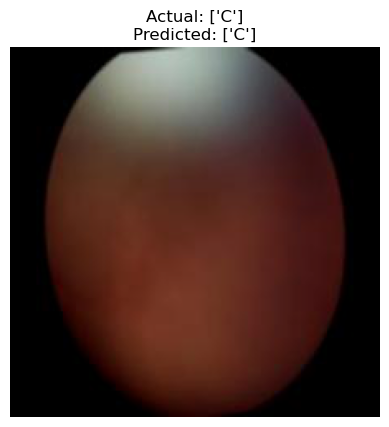

In [ ]:
import random
import matplotlib.pyplot as plt

# Function to predict the disease for a given image
def predict_disease(image, model, device):
    model.eval()
    with torch.no_grad():
        image = image.to(device)

        # Extract features using the pretrained model
        features = pretrained_model.features(image.unsqueeze(0))
        features = features.view(features.size(0), -1)  # Flatten the features

        outputs = model(features)
        predicted = torch.argmax(outputs, dim=1)

    return predicted

# Select a random image from the test dataset
random_index = random.randint(0, len(test_dataset) - 1)
image, actual_label = test_dataset[random_index]

# Predict the disease
predicted_label = predict_disease(image, model, device)

# Convert the actual and predicted labels to disease names
actual_diseases = [k for k, v in label_mapping.items() if actual_label[v] == 1]
predicted_diseases = [k for k, v in label_mapping.items() if v == predicted_label.item()]

# Unnormalize the image for display
image = image.permute(1, 2, 0).numpy()
image = (image * [0.229, 0.224, 0.225]) + [0.485, 0.456, 0.406]  # Unnormalize
image = image.clip(0, 1)

# Display the image with actual and predicted labels
plt.imshow(image)
plt.title(f"Actual: {actual_diseases}\nPredicted: {predicted_diseases}")
plt.axis('off')
plt.show()

### (tried applying RNN)

In [ ]:
# import torch
# import torch.nn as nn
# import numpy as np
# import torch.optim as optim

# class HyperparameterRNN(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size, num_layers=1):
#         super(HyperparameterRNN, self).__init__()
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
#         out, _ = self.rnn(x, h0)
#         out = self.fc(out[:, -1, :])
#         return out

# def generate_hyperparameters(rnn_model, input_seq):
#     rnn_model.eval()
#     with torch.no_grad():
#         input_seq = torch.tensor(input_seq, dtype=torch.float32).unsqueeze(0)
#         output = rnn_model(input_seq)
#         hidden_units = int(output[0, 0].item())
#         learning_rate = float(output[0, 1].item())
#     return hidden_units, learning_rate

# # Example input sequence (you can customize this)
# input_seq = np.random.rand(10)  # Example input sequence of length 10

# # Custom CNN model
# class CustomCNN(nn.Module):
#     def __init__(self, num_classes, hidden_units):
#         super(CustomCNN, self).__init__()
#         self.fc = nn.Linear(1024, hidden_units)
#         self.output = nn.Linear(hidden_units, num_classes)

#     def forward(self, x):
#         x = torch.flatten(x, 1)
#         x = self.fc(x)
#         x = nn.ReLU()(x)
#         x = self.output(x)
#         return x

# # Training function
# def train_custom_cnn(hidden_units, learning_rate, dataloader, num_classes=8, num_epochs=10):
#     model = CustomCNN(num_classes, hidden_units)
#     criterion = nn.CrossEntropyLoss()
#     optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#     for epoch in range(num_epochs):
#         model.train()
#         running_loss = 0.0
#         for images, labels in dataloader:
#             outputs = model(images)
#             loss = criterion(outputs, labels)

#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()

#         avg_loss = running_loss / len(dataloader)
#         print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

#     return avg_loss

# # Initialize the RNN model
# input_size = 10  # Example input size
# hidden_size = 50  # Example hidden size
# output_size = 2  # We need two outputs: hidden_units and learning_rate
# rnn_model = HyperparameterRNN(input_size, hidden_size, output_size)

# # Example optimization loop
# num_iterations = 50
# for iteration in range(num_iterations):
#     # Generate hyperparameters
#     hidden_units, learning_rate = generate_hyperparameters(rnn_model, input_seq)

#     # Train the CustomCNN model
#     avg_loss = train_custom_cnn(hidden_units, learning_rate, dataloader)

#     # Update the RNN model based on the performance (avg_loss)
#     # Here you can implement your own logic to update the RNN model
#     # For example, you can use reinforcement learning techniques to update the RNN model
#     # based on the reward (negative avg_loss)

#     print(f"Iteration [{iteration+1}/{num_iterations}], Hidden Units: {hidden_units},\
#         Learning Rate: {learning_rate}, Loss: {avg_loss:.4f}")